### 

## PIMA Indian Diabetes : Binary Prediction using Perceptron

### Preprocessing

#### Dataset Loading

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pima = pd.read_csv("diabetes.csv")

#### Data Type for each Column(Attribute)

In [3]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Histogram Representation for each attribute

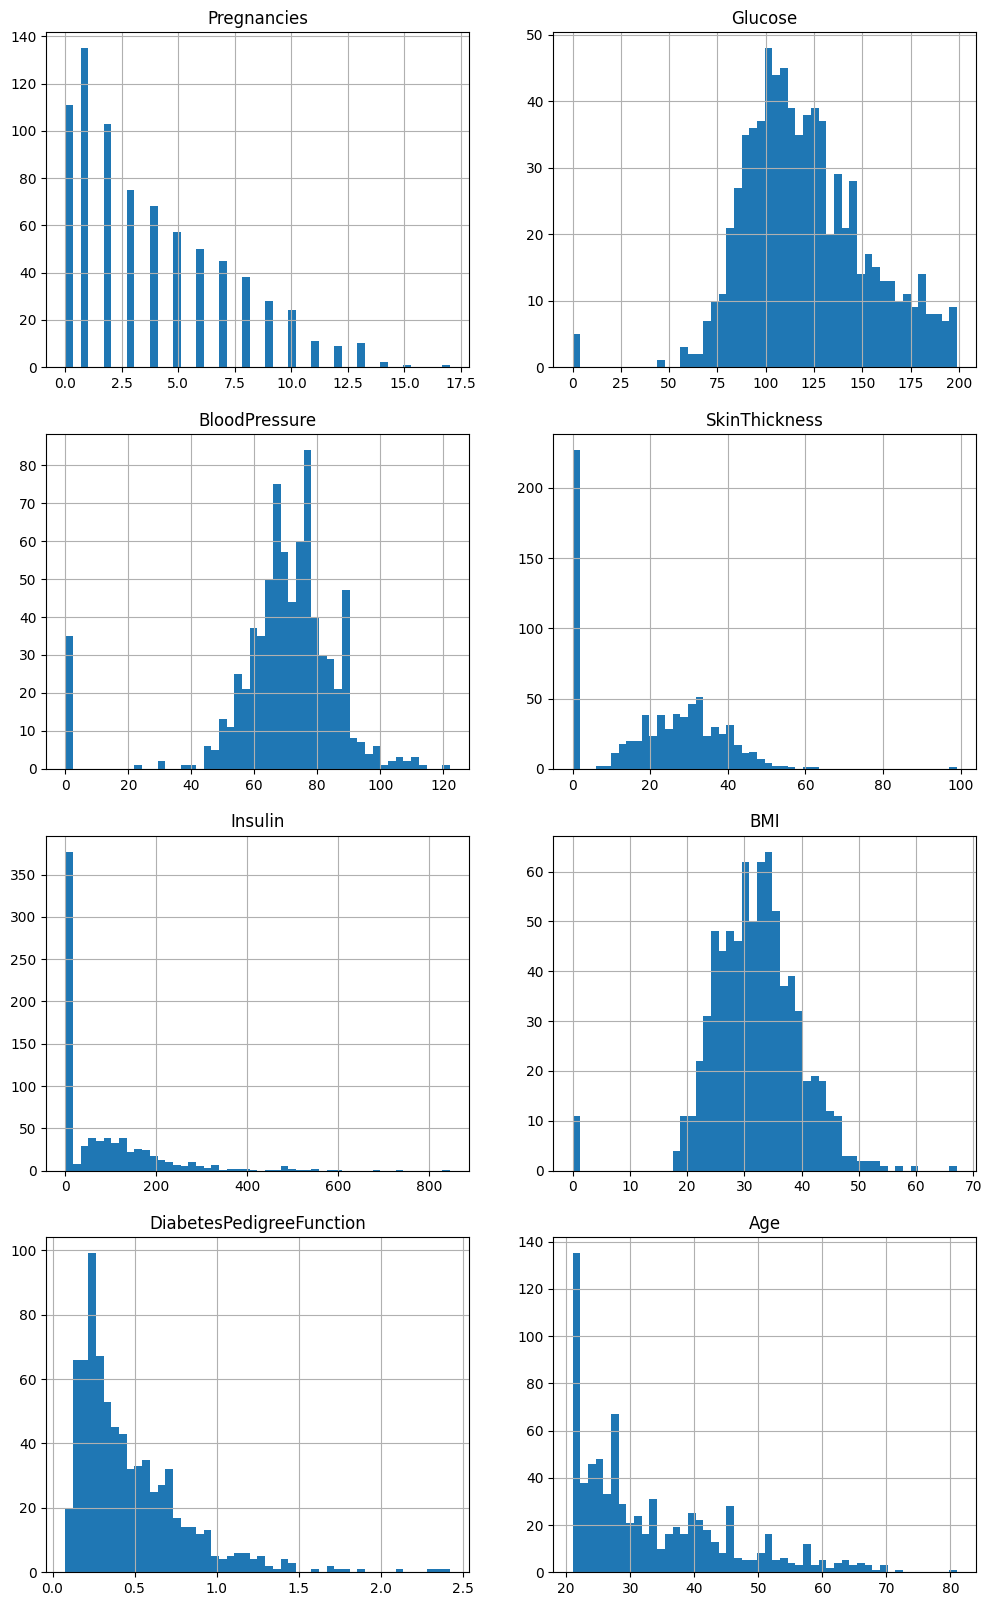

In [4]:
#3x3 version
# pima.hist(bins=50, figsize=(12, 8))
# plt.show()
fig, axs = plt.subplots(4, 2, figsize=(12, 20))

for i in range(4):
    for j in range(2):
        col = i * 2 + j
        axs[i, j].hist(pima.iloc[:, col], bins=50)
        axs[i, j].set_title(pima.columns[col])
        axs[i, j].grid(True)

plt.show()

#### Attribute Description

In [5]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Missing Values

In [6]:
print(np.sum(pima.isna()))

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Cross Validation

In [7]:
X = pima.drop('Outcome', axis=1)
y = pima['Outcome']

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Feature Scaling
All the input features are numerical values,<br> Standarization (Z-score normalization):

$$ x_i = \frac{(x_i−\mu_i)}{\sigma} $$
 
$ \mu = \text{Mean} $ <br>
$ \sigma = \text{Standard deviation} $

In [9]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

For the below code, reference was taken
Reference : <br>
Option - 1 : Vakharia K, 2021, *Diabetes Prediction(EDA+Classification Algo)*, Viewed 21 September 2023, <https://www.kaggle.com/code/kathanvakharia/diabetes-prediction-eda-classification-algo>
<br>
Option - 2 : Kaggle, Diabetes Prediction(EDA+Classification Algo), Viewed 21 September 2023,  <https://www.kaggle.com/code/kathanvakharia/diabetes-prediction-eda-classification-algo>
<br>
https://mediaproduction.adelaide.edu.au/referencing-guide/

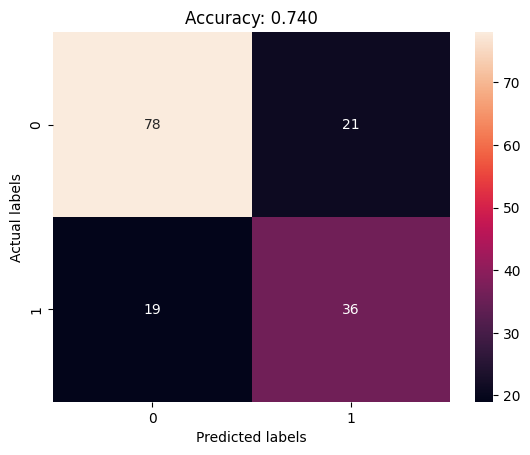

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



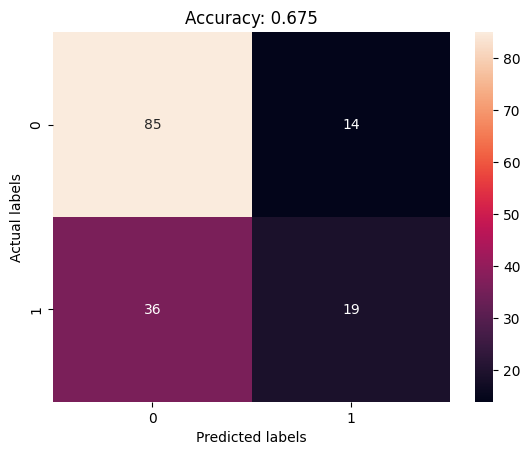

              precision    recall  f1-score   support

           0       0.70      0.86      0.77        99
           1       0.58      0.35      0.43        55

    accuracy                           0.68       154
   macro avg       0.64      0.60      0.60       154
weighted avg       0.66      0.68      0.65       154



In [10]:
#TODO  Need help with Citation
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import Perceptron
#Helper functions to judge different classifiers

def disp_cm(y_test, y_pred)->float:
    """Displays the confusion matrix in the form of heatmap.
    
    Parameters:
    y_test (array-like): list of true labels
    y_pred (array-like): list of predicted labels
    
    Returns:
    acc_score (float): Accuracy score 
    """
    acc_score = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"Accuracy: {acc_score:0.3f}")
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.show()
    return acc_score


def judge_clf(classifier, X_train=X_train, y_train=y_train,
              X_test=X_test, y_test=y_test)->float:
    """Fits the `classifier` to `X_train`, `y_train` and generate an elegant 
    classification report using `X_test` and `y_test`.
    
    Parameters:
    classifer : classifier obj implementing 'fit' method.
    X_train (array-like): 2D-array of input features of Training Set.
    y_train (array-like): list of target features of Training Set.
    X_test  (array-like): 2D-array of input features of Testing Set.
    y_test  (array-like): list of target features of Testing Set.
    
    Returns:
    acc_score (float): Accuracy score 
    """
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc_score = disp_cm(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    return acc_score

mlp_clf = MLPClassifier(random_state=0)
mlp_acc = judge_clf(mlp_clf)


# Create a Perceptron classifier
per_clf = Perceptron(random_state=0)
per_acc = judge_clf(per_clf)